# **Diabetes Prediction using SVM**

# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Data Loading and Overview**

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Data Preprocessing and Visualization**

In [ ]:
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',]

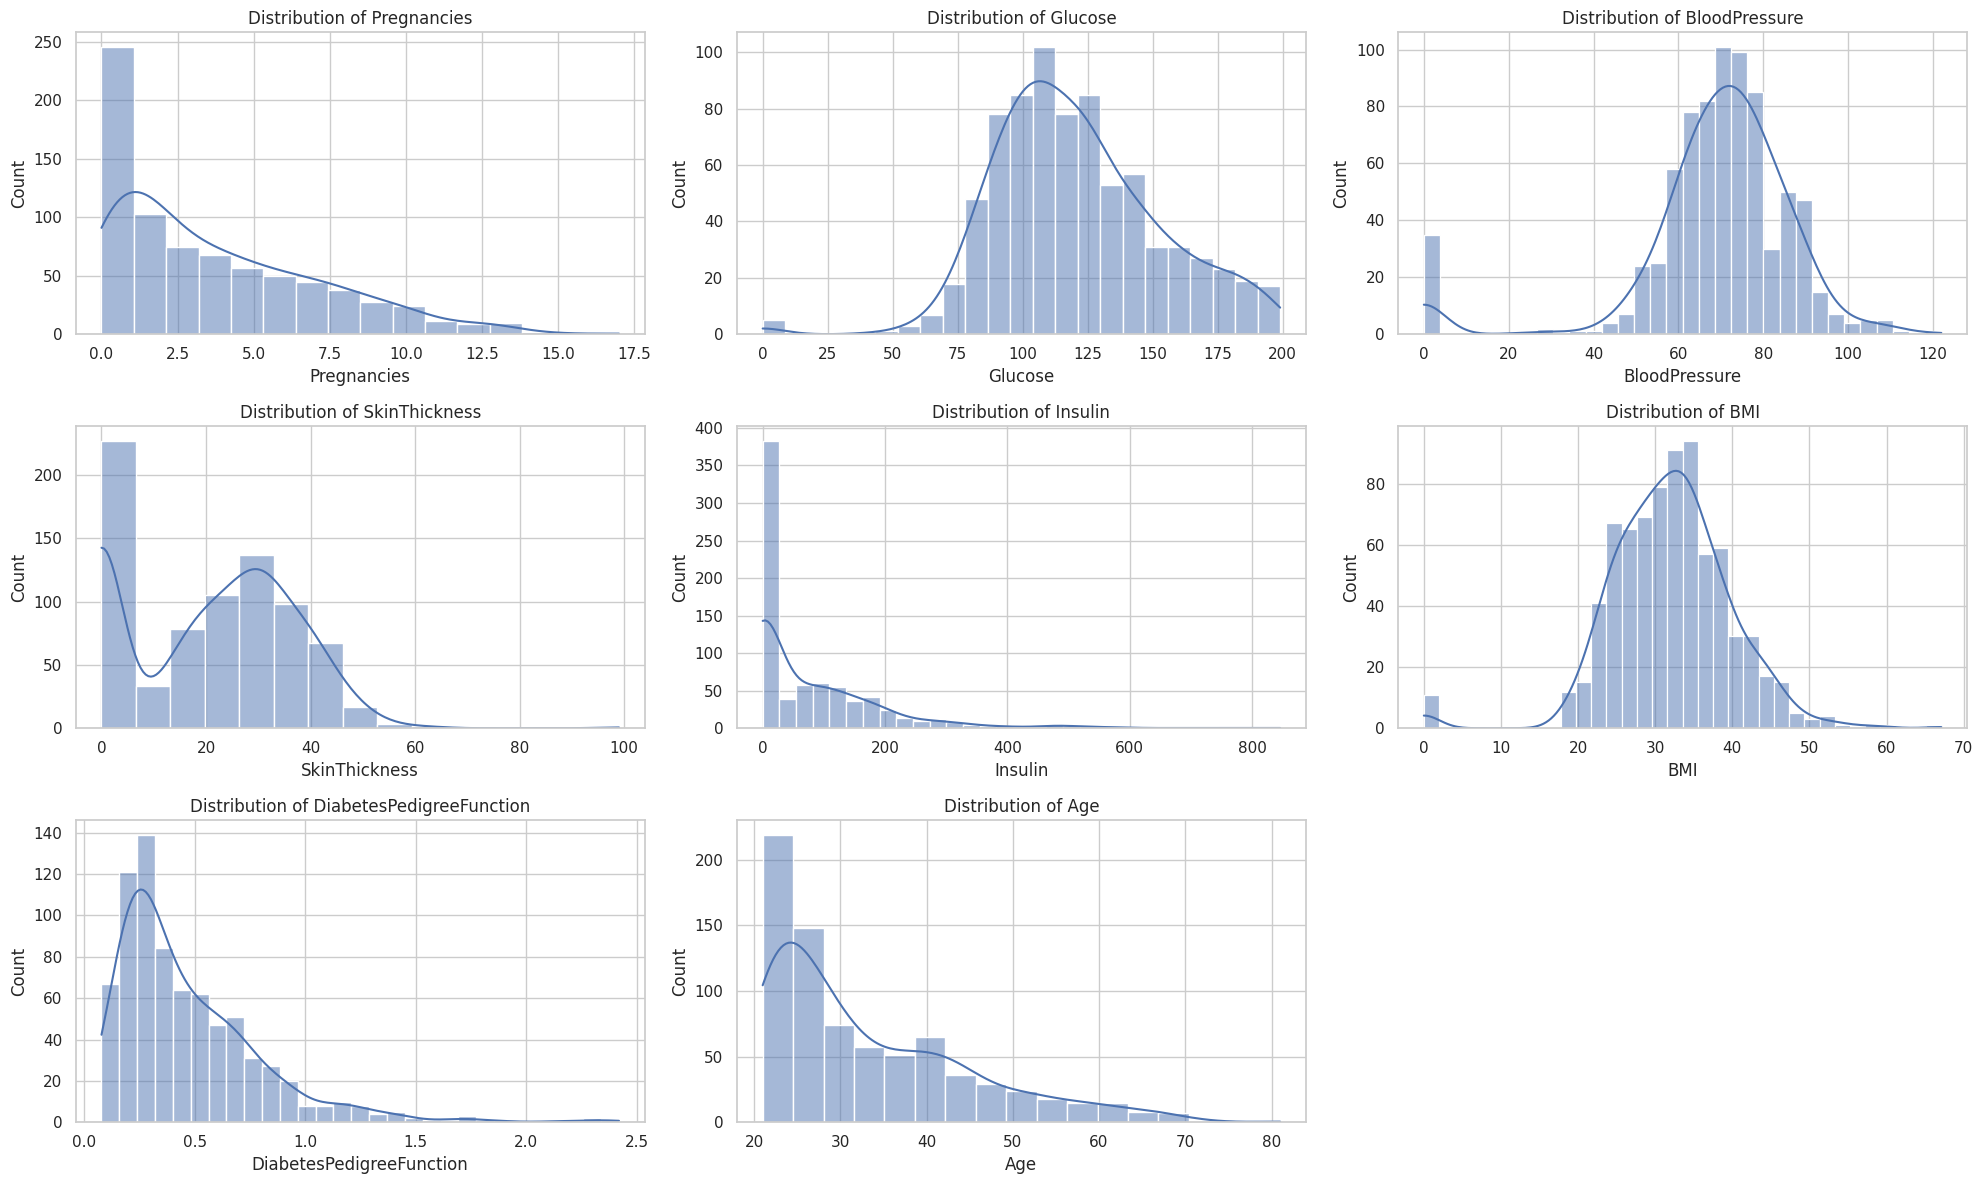

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

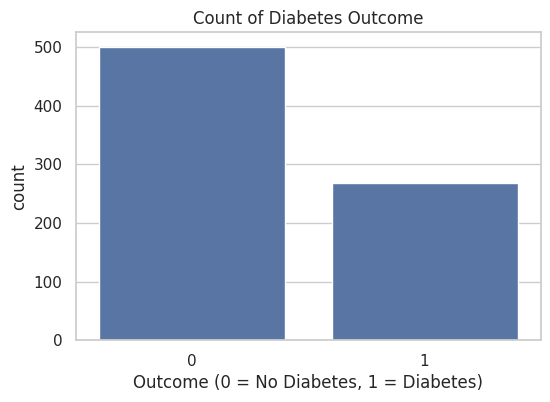

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

sns.countplot(x='Outcome', data=df)
plt.title("Count of Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")

plt.show()

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


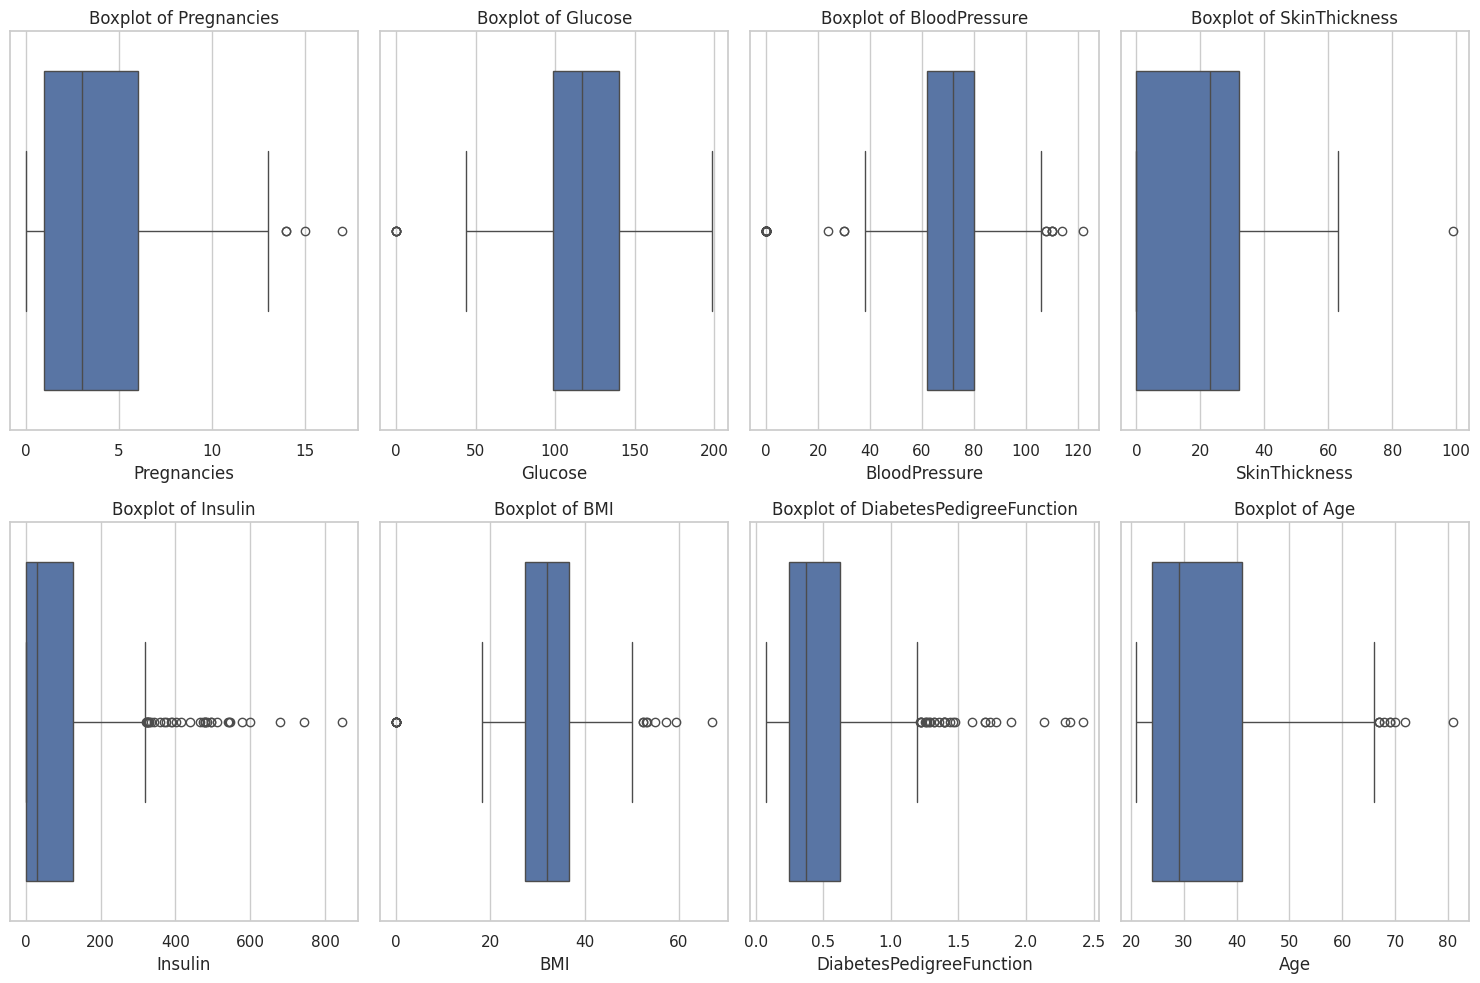

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


In [ ]:
# Outliers are not removed because this is medical data; extreme values may represent rare but critical patient conditions
# Removing them could discard important clinical cases, so we keep them and handle their effect through scaling during preprocessing

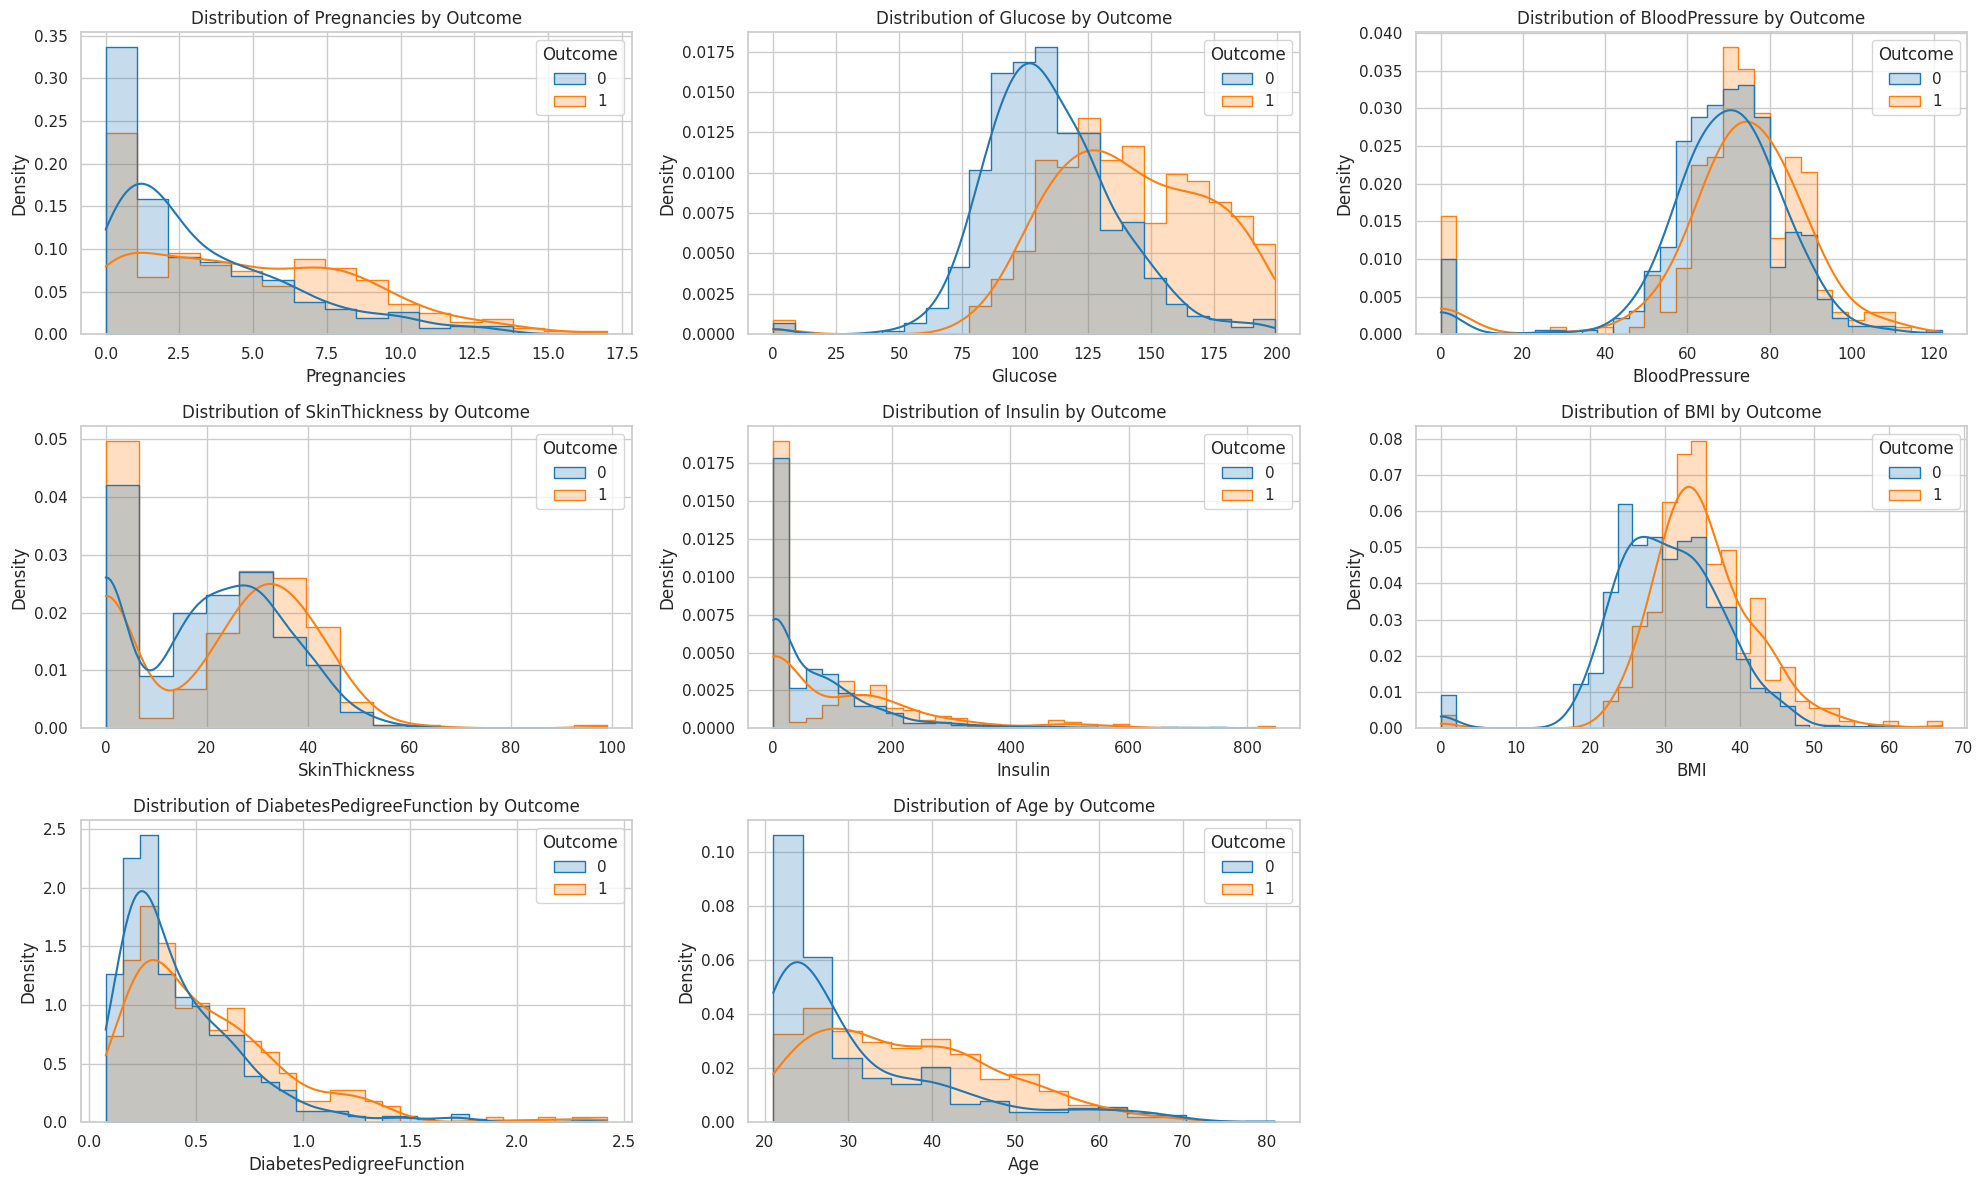

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, palette='tab10', element='step', stat='density', common_norm=False)
    plt.title(f"Distribution of {col} by Outcome")
plt.tight_layout()
plt.show()

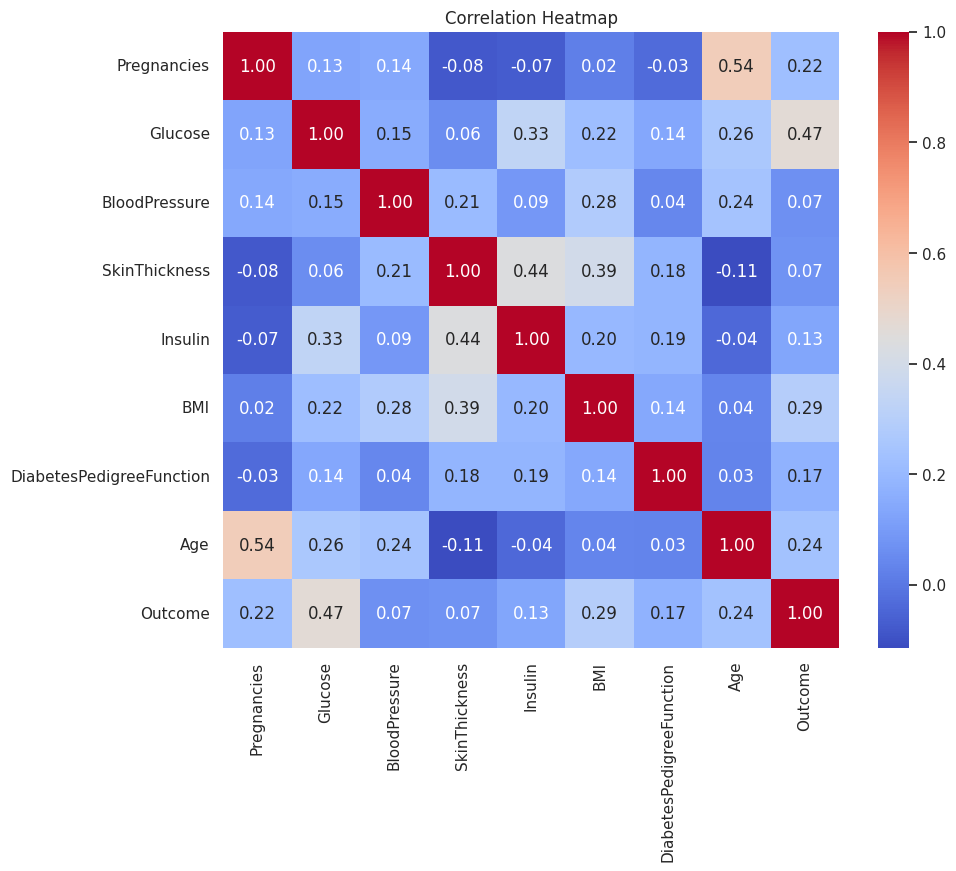

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()

# **Modeling and Evaluation**

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train_res)
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [ ]:
cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[69 31]
 [13 41]]


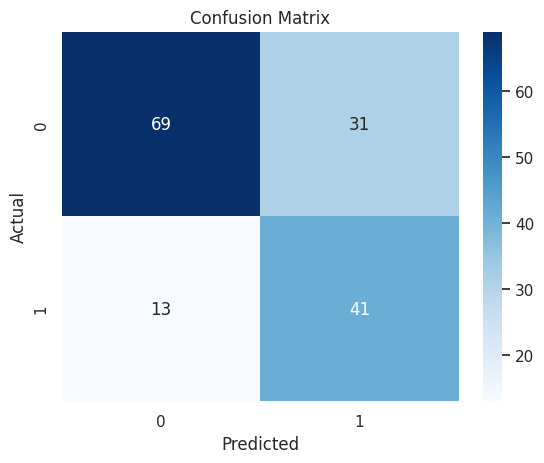

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       100
           1       0.57      0.76      0.65        54

    accuracy                           0.71       154
   macro avg       0.71      0.72      0.70       154
weighted avg       0.75      0.71      0.72       154

